In [ ]:
#Importing the relevant packages

import numpy as np
import pandas as pd

In [ ]:
#Creating a dataframe and reading the salesperson file into the dataframe

#The CSV file was created with the data provided in the question
df = pd.read_csv("Salesperson.csv")
df.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [ ]:
#Printing the mean of Old scheme and New scheme
m1 = df['Old Scheme (in thousands)'].mean()
m2 = df['New Scheme (in thousands)'].mean()

print("The mean of policies assured in Old scheme:", m1)
print("The mean of policies assured in New Scheme:", m2)

The mean of policies assured in Old scheme: 68.03333333333333
The mean of policies assured in New Scheme: 72.03333333333333


 Insights:

	• Sample of 30 salesperson is the same. But two different experiments are conducted. 
	• One, before the new scheme and the other, after the new scheme.
	• This is an example of "Paired Two Sample Testing".


Approach:

	• First formulate the Null Hypothesis and Alternate Hypothesis.
	
	• Test of Assumptions :
       1) Normality Assumption :
          Visual approach - Histogram
          Statistical approach - Shapiro's Test
       2) Equality of Variance :
          Visual approach - Boxplot
          Statistical approach - Levene's Test

	• Model Selection:
	   1) If data is normal, go for Parametric Modelling.
	      T Test, Z Test
	   2) If data is not normal, go for Non Parametric Modelling. 
	      Wilcoxon

	• Run the model and take decisions based on the model output.


In [ ]:
#Formulating the Null and Alternate Hypothesis

#Null Hypothesis : The mean of Old scheme and New scheme are equal
#Alternate Hypothesis : The mean of Old scheme and New scheme are not equal

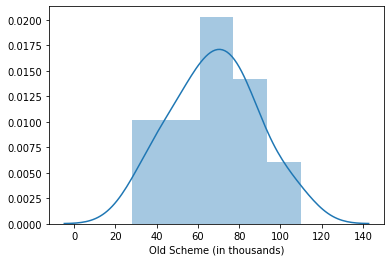

In [ ]:
#Conducting the assumptions test


#Test of Normality using histogram for both the samples
import seaborn as sns
sns.distplot(df['Old Scheme (in thousands)'])

From the above distribution plot, we infer that the 'Old Scheme (in thousands)' is normally distributed.

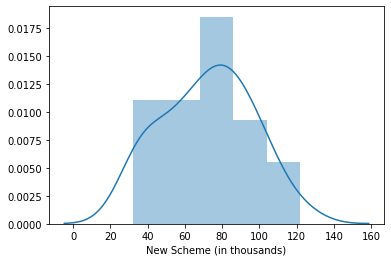

In [ ]:
sns.distplot(df['New Scheme (in thousands)'])

Although there is a small deviation from a perfected shaped 'Bell Curve', we can still infer that the 'New Scheme (in thousands)' is also normally distributed. However Shapiro's test can be used to confirm the normality of this distribution.

In [ ]:
#Conducting a Statistical Test "Shapiro's Test" to confirm the normality of the distribution
from scipy.stats import ttest_1samp, shapiro, levene

#Shapiro'sTest
#Null Hypothesis : Data is not Non-Normal
#Alternate Hypothesis : Data is Non-Normal

#Old Scheme (in thousands)
shapiro(df['Old Scheme (in thousands)'])

(0.9885101914405823, 0.9813658595085144)

Interpretation: The P value is 98.13% which is greater than 5%. Therefore the Null Hypothesis is NOT REJECTED. Hence 'Old Scheme (in thousands) is normally distributed.

In [ ]:
#New Scheme (in thousands)
shapiro(df['New Scheme (in thousands)'])

(0.9687567353248596, 0.5057420134544373)

Interpretation: The P value is 50.57% which is greater than 5% (Significance Level). Therefore the Null Hypothesis is NOT REJECTED. Hence 'New Scheme (in thousands)' is also normally distributed.

In [ ]:
df.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


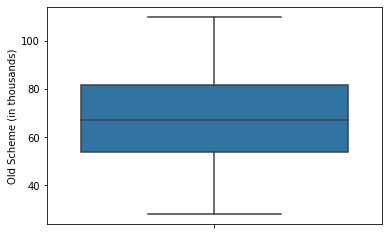

In [ ]:
#Conducting the equality of variance test 

#Visual approach using a Boxplot

import seaborn as sns

sns.boxplot(y = df['Old Scheme (in thousands)'], data = df,)

Interpretation:
#1) The median or the 50th percentile approximately divides the box into equal halves. This shows that the distribution of salesperson is symmetrical above and below the 50th percentile.
#2) The distribution is free from outliers which tells us that the variance in the data is neither too large or too small.
#3) The average distance of each data point from the mean of the distribution does not vary much.

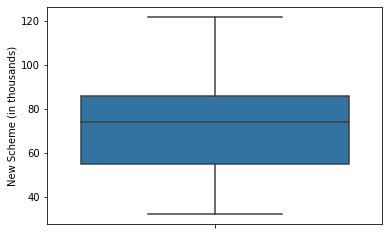

In [ ]:
sns.boxplot(y =df['New Scheme (in thousands)'], data = df)

Interpretation:
#1) The plot suggests that the concentration of salesperson below the 50th percentile are more than the concentration above the 50th percentile. 
#2) The distribution is slightly skewed on the right but it is still free from outliers. Therefore the variance is neither too large nor too small.
#3) The average distance of each data point from the mean of the distribution does not vary much.

In [ ]:
#Conducting a Statistical Levene's Test to confirm the equality of variances

#Null Hypothesis : The variances of 'Old Scheme (in thousands)' and 'New Scheme (in thousands)' are equal
#Alternate Hypothesis : The variances of 'Old Scheme (in thousands)' and 'New Scheme (in thousands)' are not equal

levene(df['Old Scheme (in thousands)'], df['New Scheme (in thousands)'])

LeveneResult(statistic=1.063061539437244, pvalue=0.30679836081811235)

Interpretation : The P value is 30.67% which is greater than the 5% significance level. Therefore the Null Hypothesis is NOT REJECTED. Hence, the test confirms that the variances of 'Old Scheme (in thousands)' and 'New Scheme (in thousands)' are equal.

Both the samples follow a distribution (Normal distribution) and the variances of the samples are equal. Therefore a Parametric model is chosen.

In [ ]:
#Conducting a T Test - Paired Two Sample Testing

t_statistic, p_value = ttest_1samp(df['Old Scheme (in thousands)'] - df['New Scheme (in thousands)'], 0)

print("The T statistic value of the Paired 2 sample test:", t_statistic)
print("The P value of the Paired 2 sample test:", p_value)

The T statistic value of the Paired 2 sample test: -1.5559143823544377
The P value of the Paired 2 sample test: 0.13057553961337662


Interpretation: 
#1) The T Statistic value is -1.55 which is greater than -1.96. Therefore the T Statistic value lies in the 95% confidence region which tells us that the distance between the T Stat value and the difference of mean of two samples is not significantly large. Therefore the Null Hypothesis is NOT REJECTED. Hence the population mean of Old scheme and New scheme are equal.
#2) The P value is 13.05% which is greater than the 5% significance level. Therefore the Null Hypothesis is NOT REJECTED. This confirms that the population mean of Old scheme and New scheme are equal.
#3) The New scheme has not raised outputs significantly.

# 3) What conclusion does the test (p-value) lead to?

Business Decision: 
#1) The mean sum assured of policies of both the schemes are equal. This tell us that the "New scheme has not raised outputs significantly".
#2) With 4 months already passed under the New scheme and only two months left to achieve the breakeven, it is best advised to dissolve the New scheme and continue with the Old scheme because nothing significant may happen in two months time.
#3) If the Titan Insurance company is willing to continue with the New scheme, then they may have to deploy more salesperson in the coming months to improve their mean sum assured of policies in order to achieve the breakeven. This would be a risky choice.